In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

Load the dataset 




In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dummy=pd.get_dummies(df['Gender'])
dummy.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [4]:
df2=pd.concat((df,dummy),axis=1)
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [5]:
df2.drop(['Gender'],axis=1)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [6]:
df2=df2.drop(['Gender'],axis=1)
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [7]:
df2=df2.drop(['Male'],axis=1)
df2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [8]:
df2.rename(columns={"Female":"Gender"})

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,0
198,199,32,137,18,0


In [9]:
df.shape

(200, 5)

In [10]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

Perform Below Visualizations.


#Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


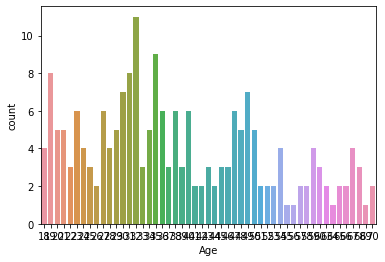

In [13]:

sns.countplot(df['Age'])


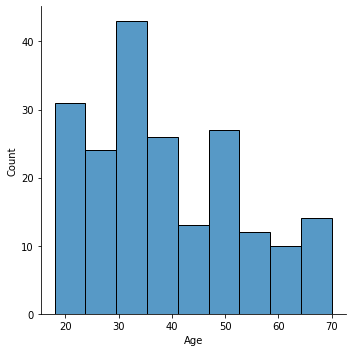

In [14]:
sns.displot(df.Age)

#Bivariate Analysis

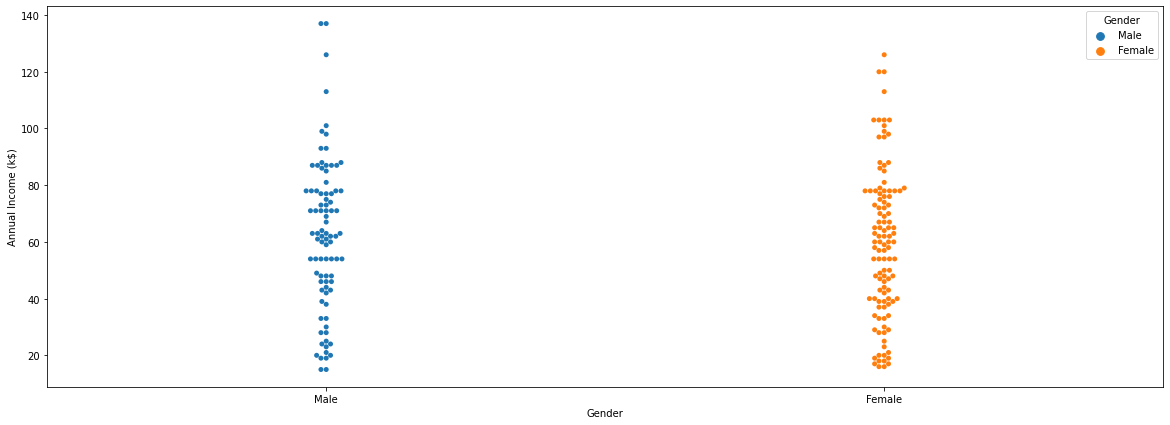

In [15]:

plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Gender', y = 'Annual Income (k$)', data = df, hue = 'Gender')

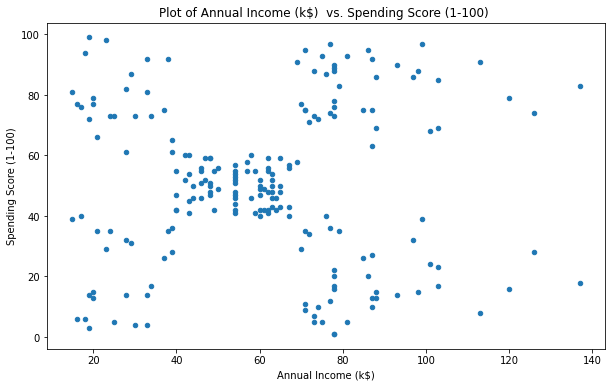

In [16]:
df.plot.scatter("Annual Income (k$)", "Spending Score (1-100)", figsize=(10, 6),
                title="Plot of Annual Income (k$)  vs. Spending Score (1-100) ")
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


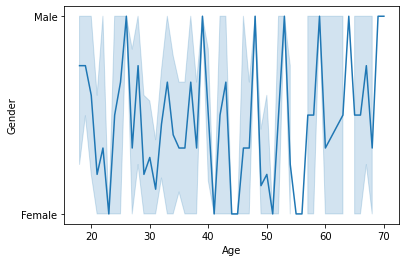

In [17]:
sns.lineplot(df.Age,df.Gender)

<Figure size 1440x360 with 0 Axes>

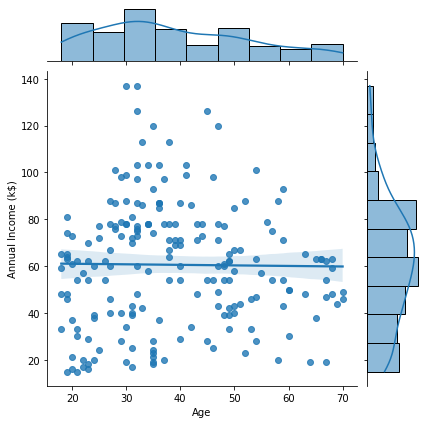

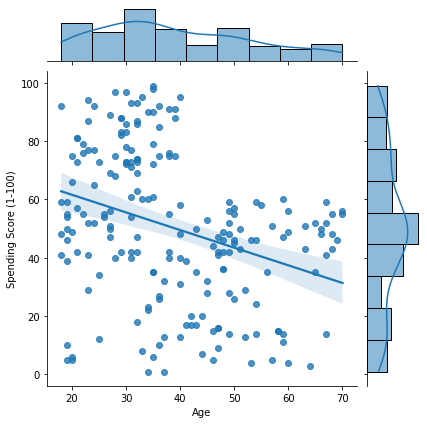

In [18]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=df, x='Age', y='Annual Income (k$)', kind='reg')
_ = sns.jointplot(data=df, x='Age', y='Spending Score (1-100)', kind='reg')

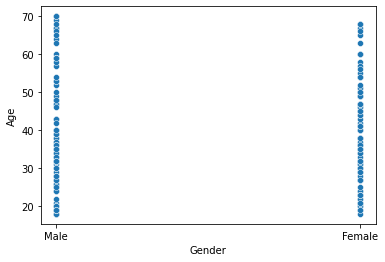

In [19]:
sns.scatterplot(x=df["Gender"],y=df["Age"])

#Multivariate Analysis

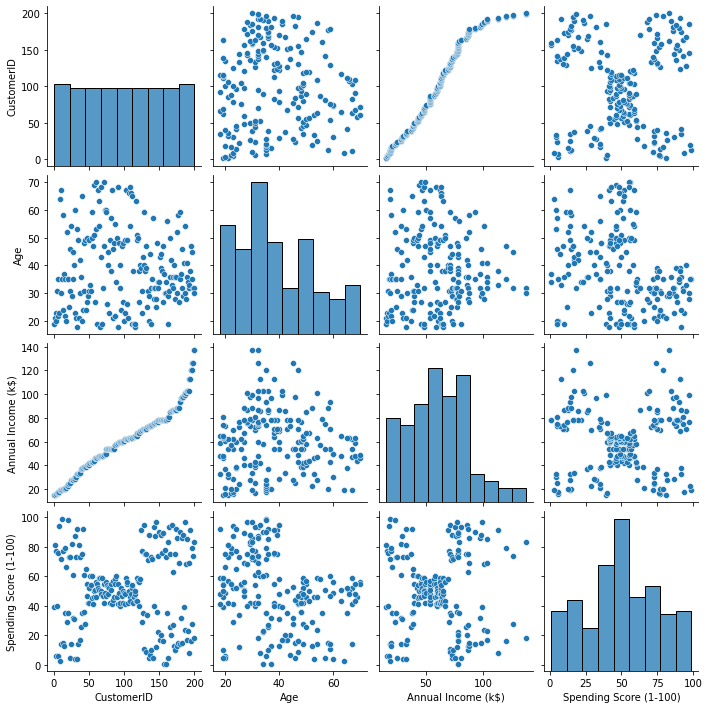

In [20]:

sns.pairplot(df)

#Descriptive statistics




In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


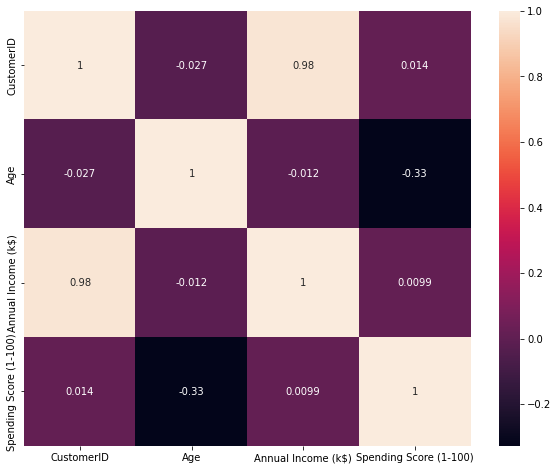

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#Check for Missing values and deal with them

In [23]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


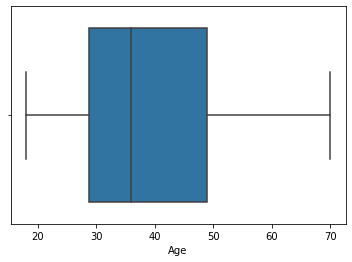

In [24]:
sns.boxplot(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


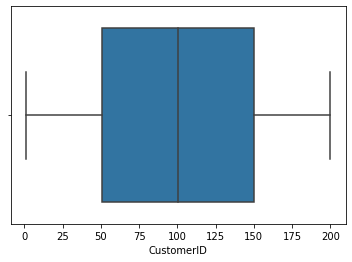

In [25]:
sns.boxplot(df.CustomerID)

#SPLITTING THE DATASET INTO X= INDEPENDENT VARIABLES AND Y = DEPENDENT VARIABLES

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

In [33]:
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


In [34]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

#Check for Categorical columns and perform encoding.


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Gender=le.fit_transform(x.Gender)



#Scaling the data

In [42]:
from sklearn.preprocessing import scale

In [43]:
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-1.424569,-1.738999
1,-1.706091,1.128152,-1.281035,-1.738999
2,-1.688771,-0.886405,-1.352802,-1.700830
3,-1.671450,-0.886405,-1.137502,-1.700830
4,-1.654129,-0.886405,-0.563369,-1.662660


#Perform any of the clustering algorithms and add the cluster data with the primary dataset

In [44]:
from sklearn import cluster

In [45]:
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df2)
  error.append(kmeans.inertia_)
  

In [46]:
error

[975512.0600000003,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.19813553878,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.3360761156]

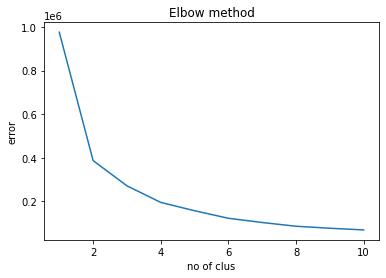

In [47]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [48]:
km_model=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)

In [49]:
km_model.fit(df2)

KMeans(n_clusters=10, random_state=0)

In [50]:
km_model.predict(df2)

array([5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9,
       5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 9, 5, 1,
       5, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 7, 4,
       4, 7, 7, 4, 7, 4, 4, 4, 7, 4, 7, 4, 4, 7, 7, 4, 7, 4, 7, 7, 7, 7,
       7, 4, 7, 4, 4, 4, 7, 7, 7, 7, 4, 7, 7, 8, 0, 8, 0, 8, 0, 8, 0, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8,
       0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int32)

In [52]:
km_model.predict([[19,21,20,23,31]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([5], dtype=int32)

#Split the data into training and testing

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

#Build the Model

In [74]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [75]:
r=Ridge()
l=Lasso()

In [77]:
r.fit(x_train,y_train)

Ridge()

In [78]:
l.fit(x_train,y_train)

Lasso()

#Train the model

In [80]:
pred1=r.predict(x_test)
pred1

array([41.62407221, 46.31323486, 39.82290817, 42.71217758, 52.70987252,
       42.95100559, 60.43854081, 42.59073695, 42.83402683, 48.64478227,
       57.09681882, 54.9917075 , 51.42373562, 47.2161678 , 38.42888327,
       59.92664529, 57.86839877, 43.15744306, 56.08960193, 37.35283072,
       55.31570626, 52.32277826, 58.85829947, 55.58703624, 32.22025906,
       47.05532343, 48.55317649, 50.74253692, 50.61229177, 46.65531193,
       54.05453415, 43.52170773, 45.03723274, 61.01220158, 48.56111567,
       51.7138969 , 47.52758844, 56.03467465, 47.90263422, 38.01798058])

In [81]:
pred1_train=r.predict(x_train)

In [83]:
pred2=l.predict(x_test)
pred2

array([42.77358755, 47.85538186, 41.92662183, 44.46751899, 53.36065904,
       45.31448471, 57.59567811, 44.46751899, 42.35029515, 48.27905519,
       56.74852192, 53.78433237, 51.24343521, 47.00860661, 40.65617325,
       57.17219525, 57.17200478, 44.89100185, 54.20781523, 39.80920753,
       54.63129809, 52.93717618, 56.74871239, 54.20781523, 35.15089607,
       48.27886472, 49.97279616, 52.09021046, 49.97298663, 46.16164089,
       52.09040093, 44.89100185, 46.58493329, 58.86612668, 47.43208947,
       51.66691807, 48.70234758, 53.78433237, 47.43208947, 38.96243227])

In [85]:
pred2_train=l.predict(x_train)

In [86]:
profit=pd.DataFrame({'Actual':y_test,'ridge_pred':pred1,'lasso_pred':pred2})
profit.head(11)

,Actual,ridge_pred,lasso_pred
18,29,41.624072,42.773588
170,13,46.313235,47.855382
107,46,39.822908,41.926622
98,42,42.712178,44.467519
177,69,52.709873,53.360659
182,15,42.951006,45.314485
5,76,60.438541,57.595678
146,36,42.590737,44.467519
12,15,42.834027,42.350295
152,20,48.644782,48.279055


#Test the model

In [87]:
p=r.predict([[5, 9, 5, 9]])
print(p)
p1=l.predict([[5, 9, 5, 9]])
print(p1)



[-11.45569342]
[10.56374581]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


#Measure the performance using Evaluation Metrics

In [88]:
from sklearn import metrics

In [89]:
# R-Square
# testing accuracy for both model
print(metrics.r2_score(y_test,pred1))
print(metrics.r2_score(y_test,pred2))

0.15350534572505825
0.15264720667758858


In [91]:
#Training accuracy for both model

print(metrics.r2_score(y_train,pred1_train))
print(metrics.r2_score(y_train,pred2_train))

0.08426049627384247
0.08056999345341631


In [92]:
## MSE(Mean square error)

print(metrics.mean_squared_error(y_test,pred1))
print(metrics.mean_squared_error(y_test,pred2))

641.2112356667258
641.8612674137936


In [93]:
## RMSE

print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))

25.322149112323103
25.334981101508514
